# Decision Tree Classification

# Import libraries

In [120]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [121]:
# step 1. Data Exploration: Understanding the dataset and key features.
loans_data = pd.read_csv('Loans_Dataset.csv')
print(loans_data.info())
print()
print(loans_data.describe())
print()
print(loans_data.head())
print(loans_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum              1004 non-null   int64 
 5   result           1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB
None

       initial_payment  last_payment  credit_score  house_number  \
count      1004.000000   1004.000000   1004.000000   1004.000000   
mean        294.662351  12473.009960    528.902390   4041.282869   
std         115.844218   1442.134231    259.681745    618.431417   
min         100.000000  10005.000000    100.000000   3003.000000   
25%         195.750000  11213.500000    302.750000   3546.500000   
50%         290.000000  12467.000000    518.000000   4046.000000   
7

In [123]:
# Label encoding
le = LabelEncoder()
loans_data['result']= le.fit_transform(loans_data['result'])

<bound method DataFrame.count of    result  count
0       0    521
1       1    483>


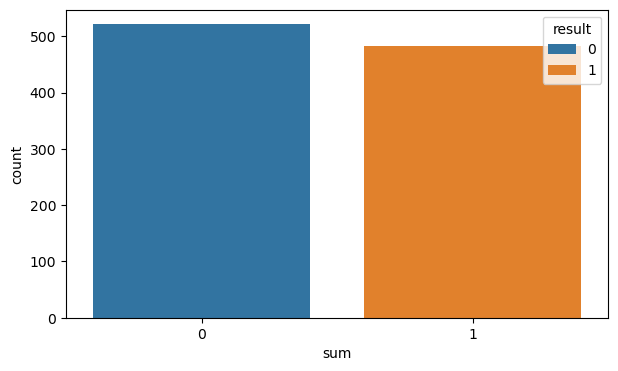

In [124]:
# use bar chart to show result of how many yes(1) and no(0)
loans_result_counts = loans_data["result"].value_counts().reset_index()
loans_result_counts.columns = ["result", "count"]
print(loans_result_counts.count)

plt.figure(figsize=(7, 4))
sns.barplot(x="result", y="count", data=loans_result_counts, estimator=sum, hue="result")
plt.xlabel(feature)
plt.show()

In [125]:
# Correlation matrix
loans_data.corr()

,initial_payment,last_payment,credit_score,house_number,sum,result
initial_payment,1.000000,-0.013536,-0.009421,0.071100,0.050698,-0.048464
last_payment,-0.013536,1.000000,-0.000805,0.057410,0.213237,-0.805640
credit_score,-0.009421,-0.000805,1.000000,0.034885,0.068387,-0.076326
house_number,0.071100,0.057410,0.034885,1.000000,0.412303,-0.202827
sum,0.050698,0.213237,0.068387,0.412303,1.000000,-0.092830
result,-0.048464,-0.805640,-0.076326,-0.202827,-0.092830,1.000000


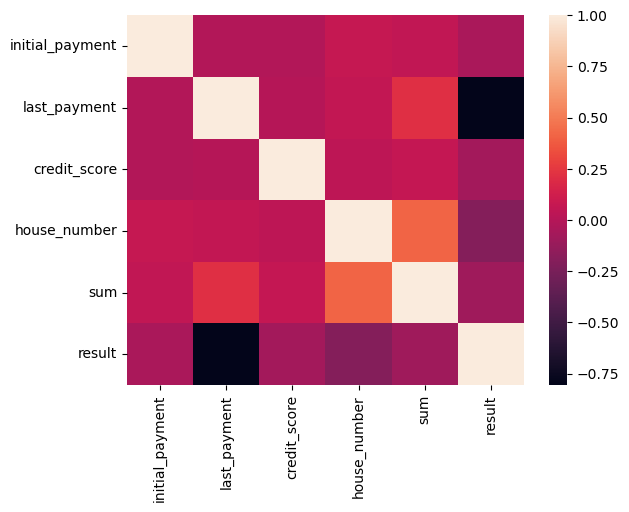

In [126]:
sns.heatmap(loans_data.corr())
plt.show()

C:\Users\marywang\AppData\Local\Temp\ipykernel_28444\4169493446.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loans_data[feature])


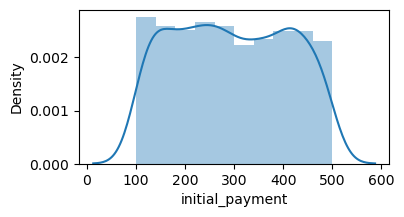

C:\Users\marywang\AppData\Local\Temp\ipykernel_28444\4169493446.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loans_data[feature])


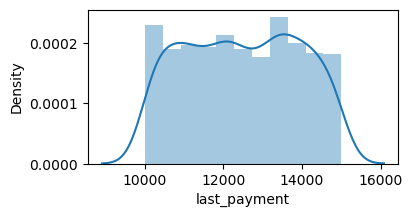

C:\Users\marywang\AppData\Local\Temp\ipykernel_28444\4169493446.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loans_data[feature])


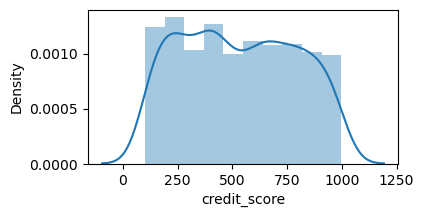

C:\Users\marywang\AppData\Local\Temp\ipykernel_28444\4169493446.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loans_data[feature])


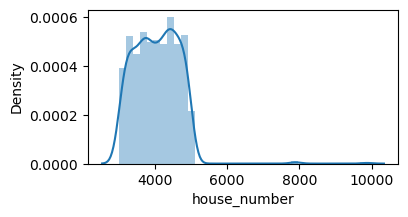

C:\Users\marywang\AppData\Local\Temp\ipykernel_28444\4169493446.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loans_data[feature])


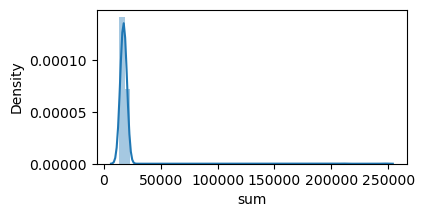

In [127]:
# use distplot to show distribution
feature_columns = loans_data.drop(columns=["result"]).columns
for feature in feature_columns:
    plt.figure(figsize=(4, 2))
    sns.distplot(loans_data[feature])
    plt.xlabel(feature)
    plt.show()

# Preprocessing

In [128]:
# step 2: Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.
data_clean = loans_data.dropna()
total_rows = len(data_clean)
print(f"total rows after cleaning data: {total_rows}\n")

# scaling and nommalization excluding the last column "result"
scaler = StandardScaler()
data_clean[data_clean.columns[:-1]] = scaler.fit_transform(data_clean[data_clean.columns[:-1]])

# Display the normalized dataset top 10 rows
print(data_clean.head())
print(data_clean.tail())

total rows after cleaning data: 1004

   initial_payment  last_payment  credit_score  house_number       sum  result
0        -0.808923     -1.703193     -1.074551     -1.610169 -0.440987       1
1        -0.774376     -1.704581     -0.515897     -1.613404 -0.425867       1
2        -0.325274     -1.626186     -1.617794     -1.278520 -0.416899       1
3        -0.420277     -1.671280     -0.789445     -1.462949 -0.414292       1
4        -1.534396     -1.635898     -0.126766     -1.532514 -0.408974       1
      initial_payment  last_payment  credit_score  house_number        sum  \
999         -1.093930      1.612990      1.175476      1.449091   0.312098   
1000        -0.523916      1.452731      0.874959      1.172447   0.305946   
1001         1.341587      0.987911      1.302618      6.236162  20.095349   
1002         0.452019      1.752437      0.609116      9.439406  23.884030   
1003         1.488409      0.750644      0.528208      6.241015   0.421485   

      result  
999 

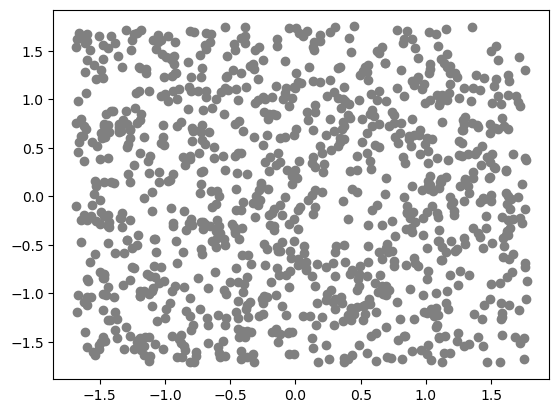

In [129]:
# Relationship between initial_payment and last_payment
plt.scatter(data_clean['initial_payment'], data_clean['last_payment'], c='gray')
plt.show()

In [131]:
# step 3: Modeling: Implementing and evaluating machine learning model - Decision Tree
X = data_clean.iloc[:, :-1].values
y = data_clean.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

# Decision Tree Classification
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [132]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

In [133]:
# step 4: Evaluation: Evaluate the performance of the model.
# Accuracy
accuracy_score(y_test, y_pred)

1.0

In [134]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       113

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251



In [135]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 1.0


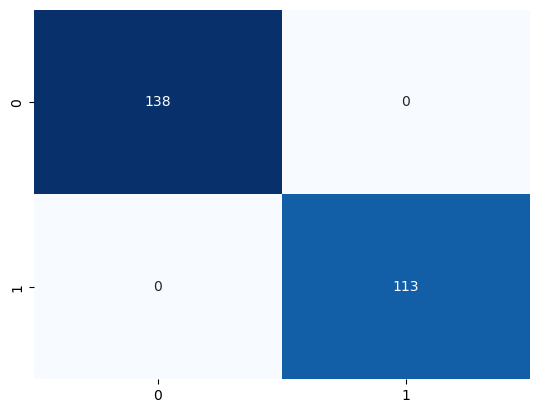

In [136]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

In [137]:
# print roc_auc_score
roc_auc_score(y_test, y_pred)

1.0

In [138]:
# Predict a new input data with initial_payment(500), last_payment(11000), credit_score(520), house_number(3700), and sum(15900)
feature_names = ["initial_payment", "last_payment", "credit_score", "house_number", "sum"]
new_data = pd.DataFrame([[500, 11000, 520, 3700, 15900]], columns=feature_names)
prediction = classifier.predict(scaler.transform(new_data))
print(prediction)

[1]
